In [23]:
# dnn: deep neural networks 深度神经网络

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.2
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.6.2
keras.api._v2.keras 2.6.0


In [25]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [26]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [27]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 这次做20层-deep
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
# 结果层
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_33 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_37 (Dense)             (None, 100)              

In [29]:
model.layers

In [30]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 9s 5ms/step - loss: 2.3014 - accuracy: 0.1544 - val_loss: 2.3001 - val_accuracy: 0.2290
Epoch 2/100
1719/1719 [==============================] - 8s 5ms/step - loss: 2.2978 - accuracy: 0.2491 - val_loss: 2.2946 - val_accuracy: 0.2266
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 2.2888 - accuracy: 0.2339 - val_loss: 2.2812 - val_accuracy: 0.2246
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 2.2669 - accuracy: 0.2219 - val_loss: 2.2456 - val_accuracy: 0.2056
Epoch 5/100
1719/1719 [==============================] - 8s 5ms/step - loss: 2.1680 - accuracy: 0.2037 - val_loss: 2.0097 - val_accuracy: 0.1936
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 1.8645 - accuracy: 0.2197 - val_loss: 1.7517 - val_accuracy: 0.2726
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 1.5372 - accuracy: 0.3637 - val_loss: 1.2729 - val_ac

In [31]:
history.history

{'loss': [2.301403045654297,
  2.2978105545043945,
  2.288764238357544,
  2.2669200897216797,
  2.168001890182495,
  1.8645099401474,
  1.5371628999710083,
  1.1406134366989136,
  0.944550096988678,
  0.8550626635551453,
  0.7913166284561157,
  0.741563081741333,
  0.7004379034042358,
  0.660260021686554,
  0.6309471726417542,
  0.6024876236915588,
  0.580005943775177,
  0.5564587116241455,
  0.5389512777328491,
  0.5256423354148865,
  0.5112322568893433,
  0.4973389208316803,
  0.4860741198062897,
  0.4745313227176666,
  0.4647102952003479,
  0.45473572611808777,
  0.44496849179267883,
  0.4359171390533447,
  0.42801421880722046,
  0.4215041995048523,
  0.41186943650245667,
  0.40210941433906555,
  0.39580801129341125,
  0.3888370394706726,
  0.38129618763923645,
  0.37624722719192505,
  0.3691624701023102,
  0.36213672161102295,
  0.358359158039093,
  0.35105472803115845,
  0.3457774519920349,
  0.34411826729774475,
  0.3360198438167572,
  0.3315812051296234,
  0.3246006667613983],
 

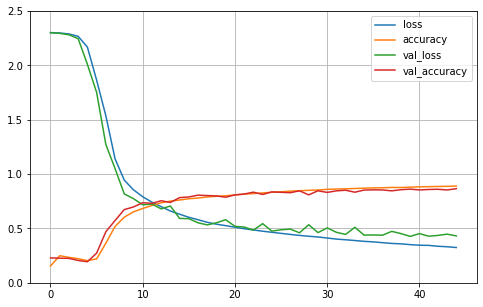

In [32]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2.5)
    plt.show()

plot_learning_curves(history)

# 如果初期变化效果不明显
# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))求导

In [33]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.45699000358581543, 0.8517000079154968]